<a href="https://colab.research.google.com/github/agargi007/PDS/blob/main/SKILL_experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the context of Python for Data Science (PDS), outliers are data points that differ significantly from other observations in a dataset. They lie far outside the overall pattern and can be caused by variability in the data, measurement errors, or rare events.


Common Methods to Identify Outliers
1. Statistical Methods

      1) Z-Score Method: A data point is considered an outlier if its z-score (standard deviations away from the mean) is greater than 3 or less than -3.   
       formula: zscore = (value - mean) / standard deviation.

      2) IQR Method: Using the interquartile range:Use the IQR= Q3 - Q1 formula to calculate the outlier.  
      Outliers are data points below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR. Can use data points below Q1 - 2 * IQR or above Q3 + 2 * IQR (for less stricter outlier).
      specify lower_bound and upper_bound .
       formula : IQR = (Q3 - Q1)

2. Visualization:
 1)Box plots.
 2)Scatter plots
 3x).Distribution plots (e.g., histograms, KDE plots)

Implementing outliers using IQR method (interquartile method)

QR (Interquartile Range) is a measure of statistical dispersion, or in simpler terms, how spread out the values in a dataset are. It is the range between the 25th percentile (Q1) and the 75th percentile (Q3), and it represents the middle 50% of the data.

formula: IQR = (Q3- Q1)

In [ ]:
import pandas as pd#importing the pandas lib
import numpy as np#importing nnumpy lib

url1 = "/content/sample_data/california_housing_test.csv"# url for dataset1
df= pd.read_csv(url1) #reading the dataset
column = df["latitude"]
# performing IQR (interquartile range)
Q1 = column.quantile(0.25)  # 25th percentile
Q3 = column.quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

lower_bound = Q1 - 2* IQR
upper_bound = Q3 + 2 * IQR

outliers = df[(column < lower_bound) | (column > upper_bound)]
print("Outliers:")
print(outliers)

# Optional: Remove outliers if needed
cleaned_data = df[(column >= lower_bound) & (column <= upper_bound)]
print("Cleaned Data:")
print(cleaned_data)

Outliers:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value]
Index: []
Cleaned Data:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10      

Implementing outliers using zscore method .

The Z-score is a statistical measure that describes how many standard deviations a data point is from the mean of the dataset.
  
  formula: (value- mean) / standard deviation.


In [ ]:
import pandas as pd
import numpy as np

url1 = "/content/sample_data/california_housing_test.csv"
df = pd.read_csv(url1)

column = df["latitude"]

mean = column.mean()
std = column.std()

z_scores = (column - mean) / std

threshold = 3

outliers = df[(z_scores < -threshold) | (z_scores > threshold)]
print("Outliers:")
print(outliers)

cleaned_data = df[(z_scores >= -threshold) & (z_scores <= threshold)]
print("Cleaned Data:")
print(cleaned_data)


Outliers:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value]
Index: []
Cleaned Data:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10      

Implementing Outliers using box plot.

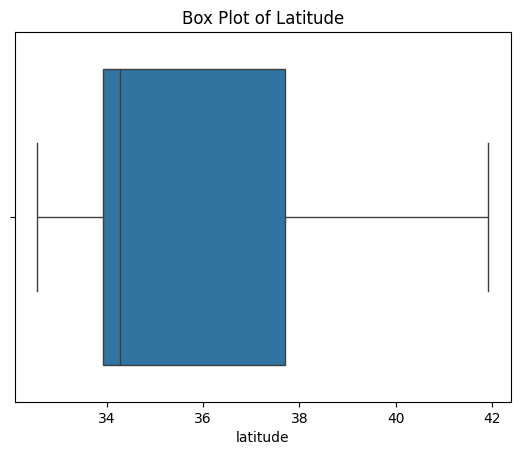

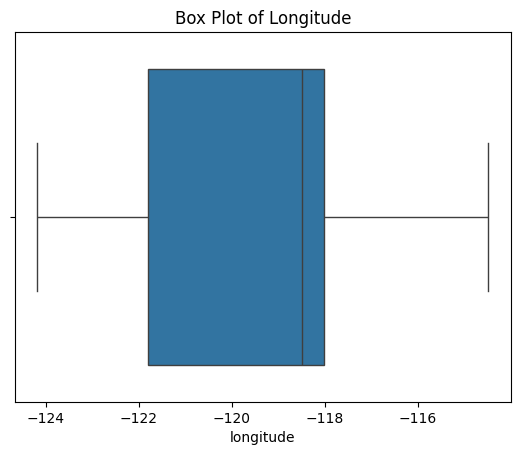

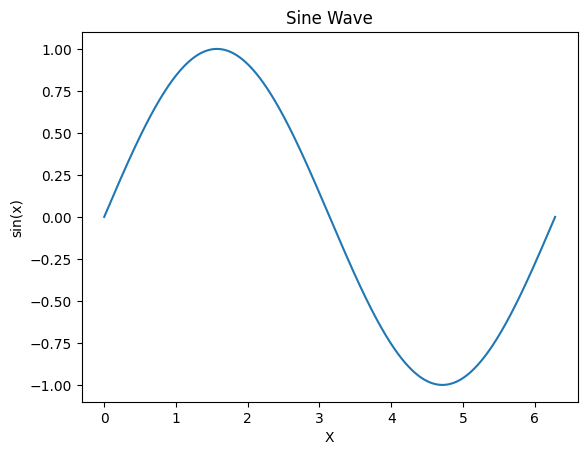

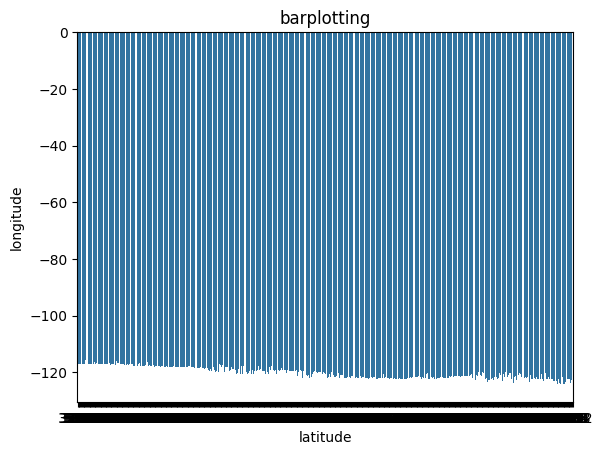

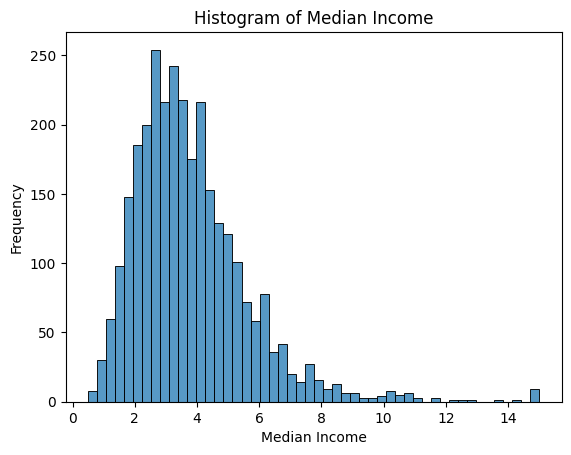

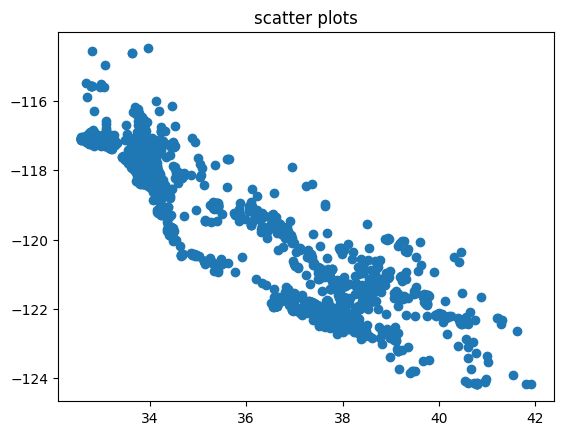

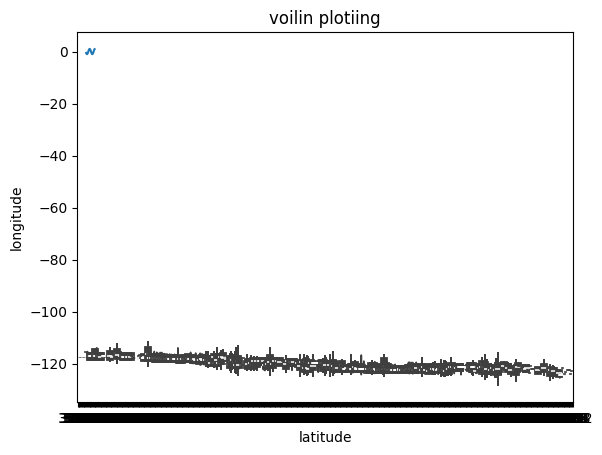

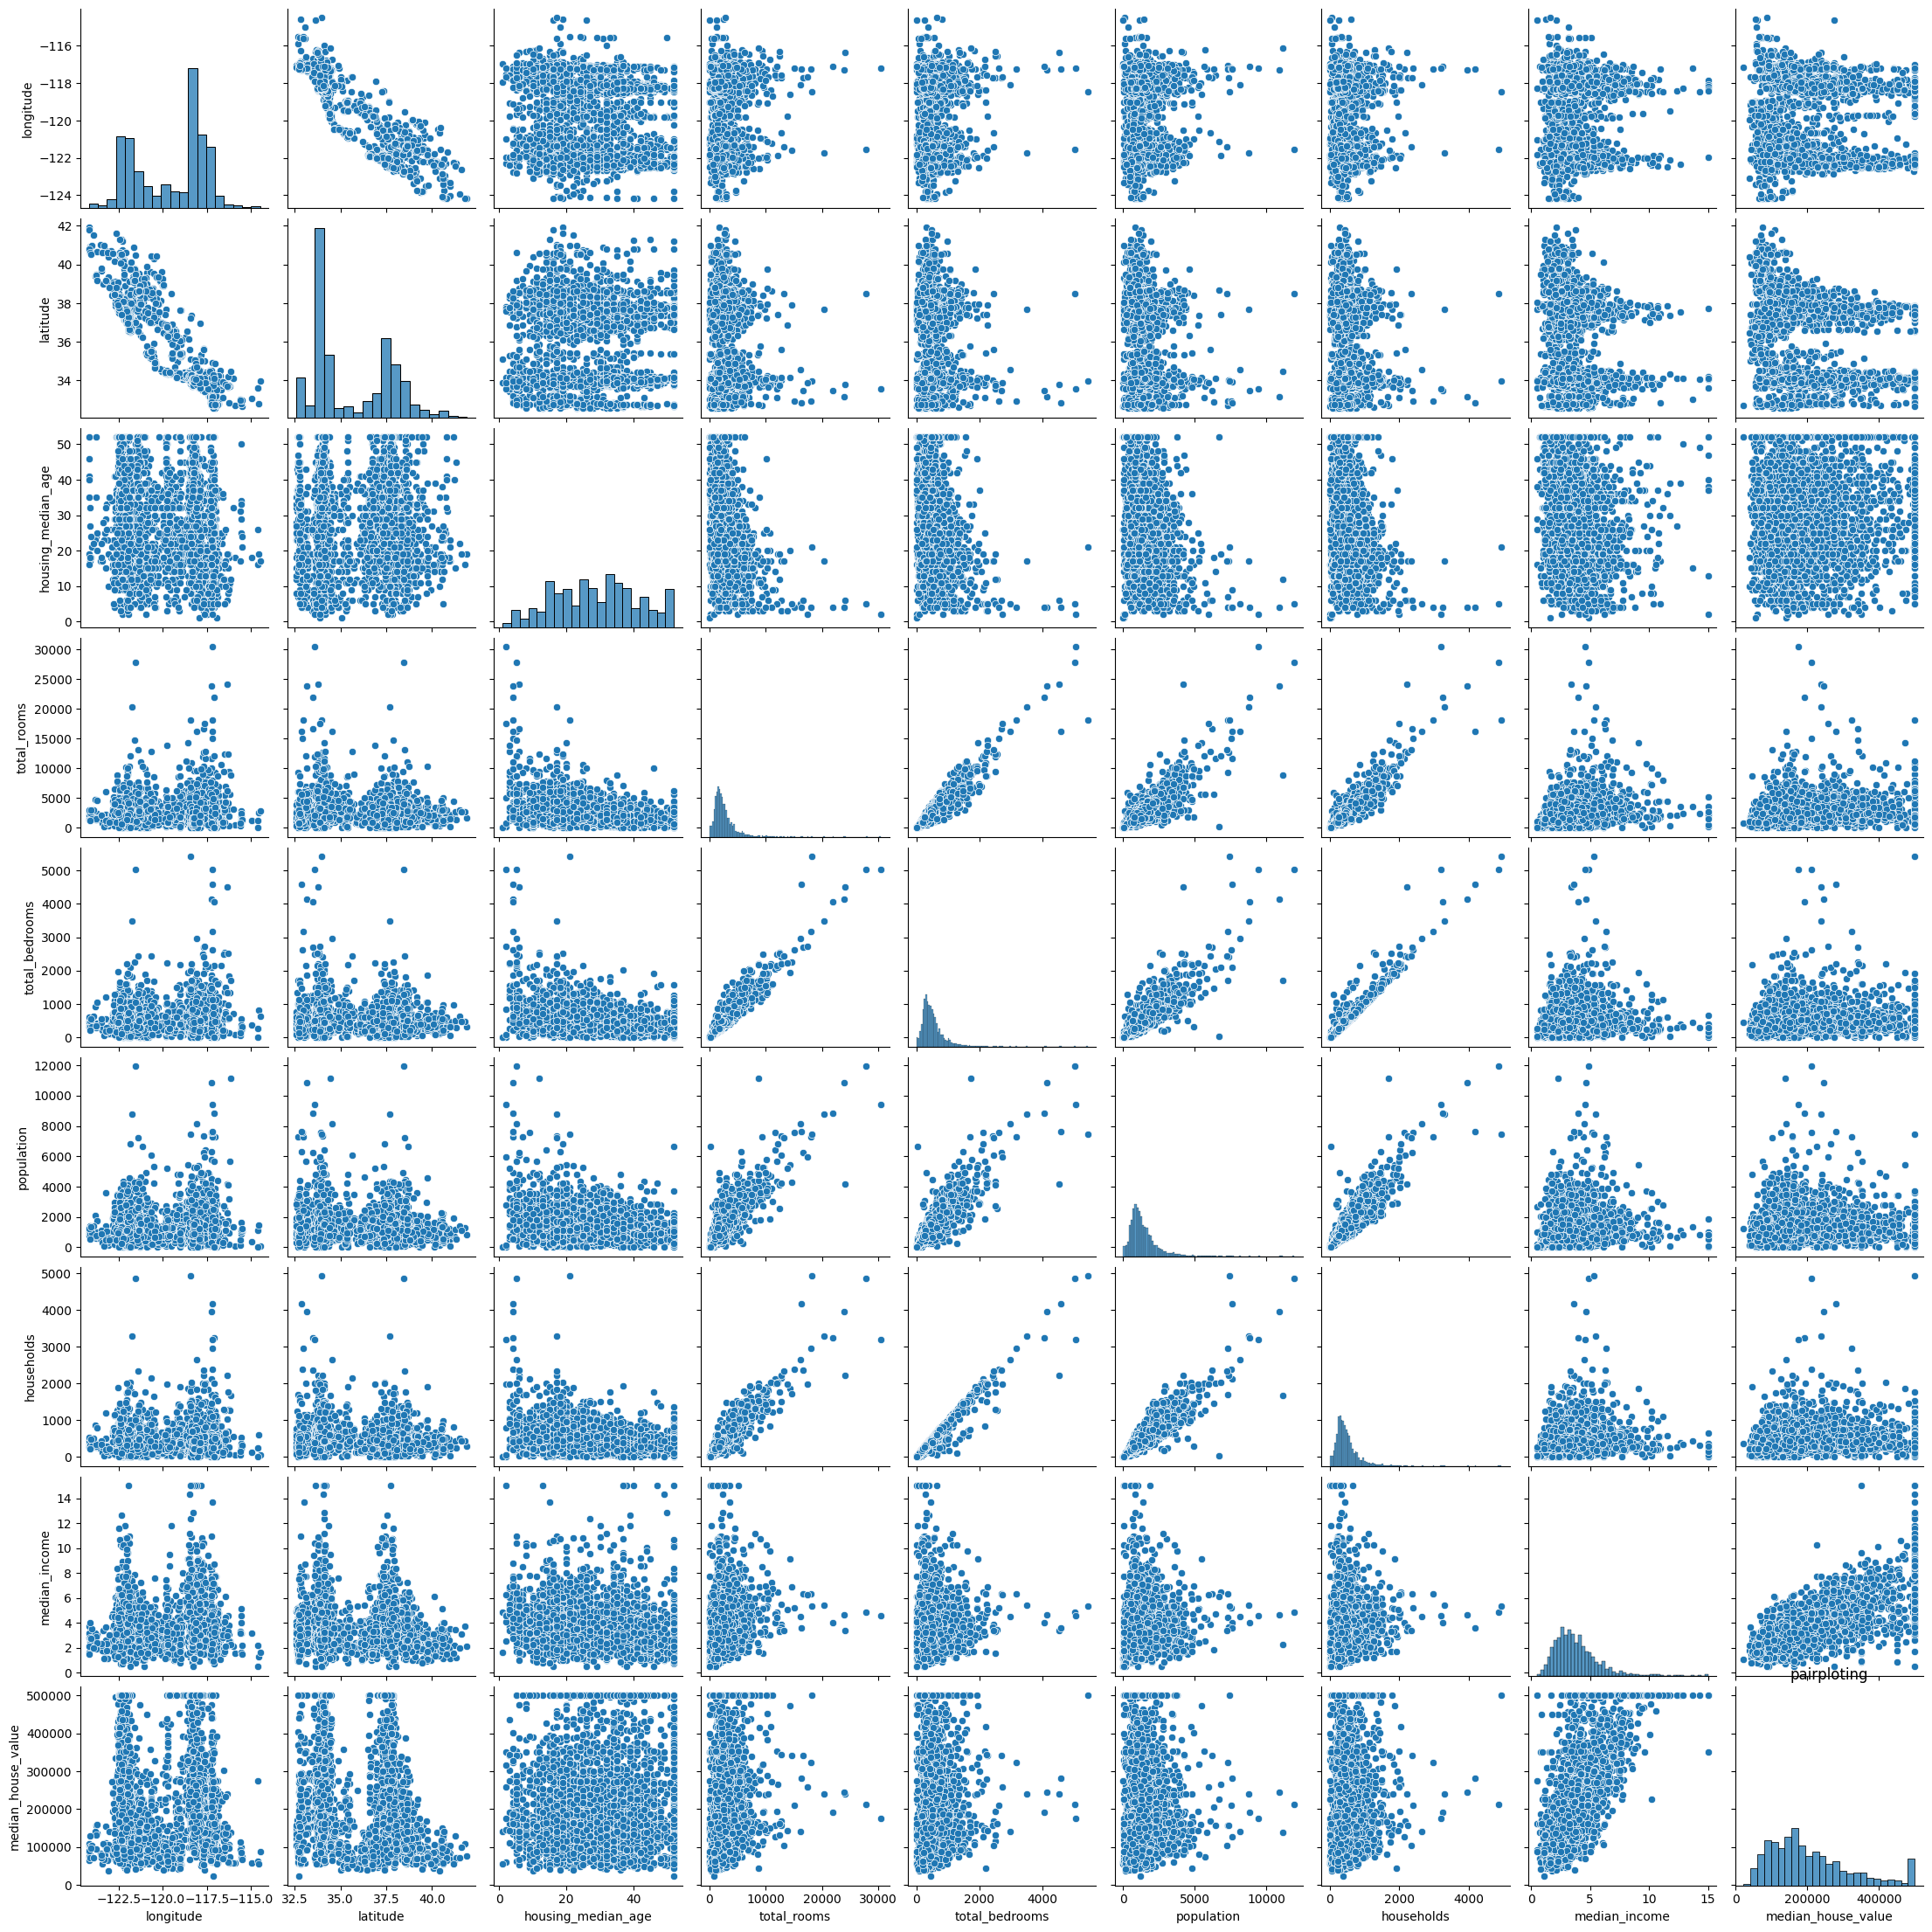

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url1 = "/content/sample_data/california_housing_test.csv"
df = pd.read_csv(url1)

# Box plot for latitude
sns.boxplot(x=df["latitude"])
plt.title('Box Plot of Latitude')
plt.show()

# Box plot for longitude
sns.boxplot(x=df["longitude"])
plt.title('Box Plot of Longitude')
plt.show()


# Sine wave plot
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

plt.plot(x, y)
plt.title('Sine Wave')
plt.xlabel('X')
plt.ylabel('sin(x)')
plt.show()

# Bar graph for mean of 'median_income' by 'ocean_proximity'
df_mean_income = df.groupby("latitude")["longitude"].mean().reset_index()

sns.barplot(x="latitude", y="longitude", data=df_mean_income)
plt.title('barplotting')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

# Histogram for 'median_income'
sns.histplot(df["median_income"])
plt.title('Histogram of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

plt.scatter(df["latitude"],df["longitude"])
plt.title("scatter plots")
plt.show()

x=np.linspace(10,20,30)
y=np.sin(x)
plt.plot(x,y)

sns.violinplot(x="latitude", y="longitude", data=df)
plt.title("voilin plotiing")
plt.show()

sns.pairplot(df)
plt.title("pairploting")
plt.show()

